## Download of stock prices and sell-side analyst ratings using LSEG API
---
### Stock prices

In [1]:
import lseg.data as ld
import pandas as pd
import numpy as np

In [2]:
# Start a session with the LSEG Data Platform (needs Refinitiv Workspace to be running in the background)
ld.open_session()

<lseg.data.session.Definition object at 0x26fe92ca6d0 {name='workspace'}>

- S&P 500 companies

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [3]:
sp500_companies = pd.read_csv("../data/sp500_companies.csv", dtype={"CIK": str})
sp500_ciks = sp500_companies["CIK"].tolist()

In [ ]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp500_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [ ]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp500_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [11]:
# Save to CSV
df.to_csv("data/sp500_monthly_prices.csv", index=False)

- S&P MidCap 600 component stocks

https://en.wikipedia.org/wiki/List_of_S%26P_600_companies

In [21]:
sp600_companies = pd.read_csv("../data/sp600_companies.csv", dtype={"CIK": str})
sp600_ciks = sp600_companies["CIK"].tolist()

In [16]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp600_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [18]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp600_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [20]:
df

,Date,CIK,Close_price,Security
0,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
1,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
2,2000-01,0001158449,<NA>,"Advance Auto Parts, Inc."
3,2000-02,0001158449,<NA>,"Advance Auto Parts, Inc."
4,2000-02,0001158449,<NA>,"Advance Auto Parts, Inc."
...,...,...,...,...
350961,2024-08,0001439288,32.43,Zurn Elkay Water Solutions Corp.
350962,2024-09,0001439288,35.94,Zurn Elkay Water Solutions Corp.
350963,2024-10,0001439288,36.1,Zurn Elkay Water Solutions Corp.
350964,2024-11,0001439288,39.82,Zurn Elkay Water Solutions Corp.


In [21]:
# Save to CSV
df.to_csv("data/sp600_monthly_prices.csv", index=False)

- S&P 400 companies


In [6]:
sp400_companies = pd.read_csv("../data/sp400_companies.csv", dtype={"CIK": str})
sp400_ciks = sp400_companies["CIK"].tolist()

In [32]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = sp400_ciks,
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CLOSEPRICE"],
  # Request adjusted close field
)

c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_access_layer\_containers.py:62:UserWarning: You have duplicated instruments in your input. Output will contain unique instruments only.
c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [33]:
# Melt into long format for easier handling
df = data.reset_index().melt(id_vars='Date', var_name='CIK', value_name='Close_price')

# Merge with company names
df = df.merge(sp400_companies[['CIK', 'Security']], on='CIK', how='left')

# Convert Date to only contain month and year
df['Date'] = df['Date'].dt.to_period('M').astype(str)

In [34]:
# Save to CSV
df.to_csv("data/sp400_monthly_prices.csv", index=False)

- S&P 1500 composite index (RIC: .SPSUP)

In [8]:
data = ld.get_history(
    #universe=tickers,
    universe = ".SPSUP",
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.PriceClose"],
  # Request adjusted close field
)

In [ ]:
df = data.copy()
df = df.reset_index().rename(columns = {"Date": "date", "Price Close": "price"}  )
df["date"] = pd.to_datetime(df["date"]).dt.to_period("M").astype(str)
df.head()

.SPSUP,date,price
0,2000-01,293.8
1,2000-02,290.93
2,2000-03,317.51
3,2000-04,307.73
4,2000-05,301.1


In [18]:
df.to_csv("../data/sp1500_composite_index_prices.csv", index=False)

- Risk free rate

In [9]:
data = ld.get_history(
    #universe=tickers,
    universe = "US3MT=RR",
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.YIELDTOMATURITY"],
)

In [10]:
df = data.copy()
df = df.reset_index().rename(columns = {"Date": "date", "Yield to Maturity": "yearly_yield"})
df["yearly_yield"] = df["yearly_yield"]/100
df["date"] = pd.to_datetime(df["date"]).dt.to_period("M").astype(str)
df["monthly_yield"] = np.round((1 + df["yearly_yield"])**(1/12) - 1, 6)
df

US3MT=RR,date,yearly_yield,monthly_yield
0,2000-01,0.055989,0.00455
1,2000-02,0.057122,0.00464
2,2000-03,0.057796,0.004693
3,2000-04,0.057334,0.004657
4,2000-05,0.055364,0.004501
...,...,...,...
287,2024-08,0.051195,0.004169
288,2024-09,0.046481,0.003793
289,2024-10,0.045548,0.003719
290,2024-11,0.044961,0.003672


In [13]:
# Missing values in risk free rate, therefore I impute them with forward fill
date_df = pd.DataFrame({"date": pd.date_range(start="2000-01-01", end='2025-01-01', freq="M")})
date_df["date"] = date_df["date"].dt.to_period("M").astype(str)
# Merge with risk-free rate DataFrame
risk_free_rate_filled = pd.merge(date_df, df, on="date", how="left")
risk_free_rate_filled["yearly_yield"] = risk_free_rate_filled["yearly_yield"].ffill()
risk_free_rate_filled["monthly_yield"] = risk_free_rate_filled["monthly_yield"].ffill()
risk_free_rate_filled

C:\Users\benny\AppData\Local\Temp\ipykernel_6040\1215217408.py:2:FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


,date,yearly_yield,monthly_yield
0,2000-01,0.055989,0.00455
1,2000-02,0.057122,0.00464
2,2000-03,0.057796,0.004693
3,2000-04,0.057334,0.004657
4,2000-05,0.055364,0.004501
...,...,...,...
295,2024-08,0.051195,0.004169
296,2024-09,0.046481,0.003793
297,2024-10,0.045548,0.003719
298,2024-11,0.044961,0.003672


In [16]:
risk_free_rate_filled.to_csv("../data/us3mt_yield_curve.csv", index=False)

---

### Sell-side analyst ratings

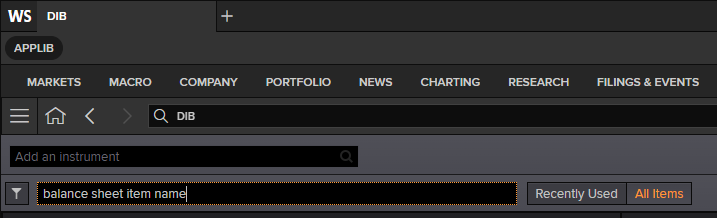


enter "DIB" in workspace

In [6]:
import lseg.data as ld
import pandas as pd
from tqdm import tqdm

In [8]:
# Start a session with the LSEG Data Platform (needs Refinitiv Workspace to be running in the background)
ld.open_session()

<lseg.data.session.Definition object at 0x1c210bcb3d0 {name='workspace'}>

In [4]:
# Read in company names to look up buy/sell recommendations for
sp400_companies = pd.read_csv("../data/sp400_companies.csv", dtype={"CIK": str})
sp500_companies = pd.read_csv("../data/sp500_companies.csv", dtype={"CIK": str})
sp600_companies = pd.read_csv("../data/sp600_companies.csv", dtype={"CIK": str})

In [5]:
# Combine all CIKs into a single list
sp400_ciks = sp400_companies["CIK"].tolist()
sp500_ciks = sp500_companies["CIK"].tolist()
sp600_ciks = sp600_companies["CIK"].tolist()
ciks = sp400_ciks + sp500_ciks + sp600_ciks

In [21]:
# Get adjusted closing prices for AAPL.O with date range and interval
data = ld.get_history(
    #universe=tickers,
    universe = ciks[0],
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=[
        "TR.RecLabel",
        "TR.RecMean"
    ],
)

In [139]:
df = data.copy()

In [ ]:
# Assume df is your original DataFrame with datetime index and multi-level columns
df = df.reset_index().rename(columns={'index': 'Date'})

# Flatten the MultiIndex columns (?)
df.columns = ['Date'] + [f'{c[0]}|{c[1]}' for c in df.columns[1:]]
df.head()


,Date,0001675149|Recommendation - Mean Label,0001675149|Recommendation - Mean (1-5),0000006201|Recommendation - Mean Label,0000006201|Recommendation - Mean (1-5),0000824142|Recommendation - Mean Label,0000824142|Recommendation - Mean (1-5),0001520697|Recommendation - Mean Label,0001520697|Recommendation - Mean (1-5),0001646972|Recommendation - Mean Label,...,0001770450|Recommendation - Mean Label,0001770450|Recommendation - Mean (1-5),0001345016|Recommendation - Mean Label,0001345016|Recommendation - Mean (1-5),0001856314|Recommendation - Mean Label,0001856314|Recommendation - Mean (1-5),0001084048|Recommendation - Mean Label,0001084048|Recommendation - Mean (1-5),0001439288|Recommendation - Mean Label,0001439288|Recommendation - Mean (1-5)
0,1996-06-27,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1997-08-14,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1997-10-16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1997-11-17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1998-01-15,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [143]:
# Melt the wide DataFrame to long format
df_long = df.melt(id_vars='Date', var_name='Company_Info', value_name='Value')

# Split the 'Company_Info' column into Company and Type
df_long[['Company', 'Type']] = df_long['Company_Info'].str.split('|', expand=True)

# Pivot so each row has verbal and numeric recommendations
df_tidy = df_long.pivot(index=['Date', 'Company'], columns='Type', values='Value').reset_index()
df_tidy.head()

# Rename columns for clarity
df_tidy.columns = ['Date', 'Company', 'Mean_rating', 'Rating']

# Strip timestamp in date column
df_tidy['Date'] = df_tidy['Date'].dt.to_period('D').astype(str)

# Display
df_tidy.head()

In [145]:
# Merge with company names
# First combine all company names into a single DataFrame
company_names = pd.concat([
    sp400_companies[['CIK', 'Security']],
    sp500_companies[['CIK', 'Security']],
    sp600_companies[['CIK', 'Security']]
]).drop_duplicates()

# Actual merge
final_df = df_tidy.merge(
    company_names,
    left_on='Company',
    right_on='CIK', 
    how='left'
).drop(columns=['CIK'])

# Strip timestamp in date column
final_df['Date'] = final_df['Date'].dt.to_period('D').astype(str)

# Display
final_df.head()

,Date,Company,Mean_rating,Rating,Security
0,1996-06-27,0000001750,<NA>,<NA>,AAR CORP.
1,1996-06-27,0000001800,<NA>,<NA>,Abbott Laboratories
2,1996-06-27,0000002488,<NA>,<NA>,Advanced Micro Devices
3,1996-06-27,0000002969,<NA>,<NA>,Air Products
4,1996-06-27,0000003453,<NA>,<NA>,"Matson, Inc."


In [146]:
# Rename Company to CIK
final_df.rename(columns={'Company': 'CIK'}, inplace=True)

# Save to CSV
final_df.to_csv("data/sp1500_sell_side_recommendations.csv", index=False)

- Second download of sell-side analyst ratings because of sparse data

In [31]:
ratings = []
skipped_ciks = []
for cik in tqdm(ciks, desc="Downloading ratings"):
    try:
        data = ld.get_history(
            universe=cik,
            start='2000-01-01',
            end='2025-01-01',
            interval='monthly',
            fields=["TR.RecLabel", "TR.RecMean"]
        )
        data["cik"] = cik
        data = data.reset_index()
        data = data.rename(columns={"Recommendation - Mean Label": "rating", "Recommendation - Mean (1-5)": "mean_rating", "Date": "date"})
        ratings.append(data)
    except Exception as e:
        print(f"Skipping CIK {cik} due to error: {e}")
        skipped_ciks.append(cik)
        continue

# Combine all ratings into a single DataFrame
ratings = pd.concat(ratings, ignore_index=True)

# Convert date to only contain month and year
ratings["date"] = ratings["date"].dt.to_period("M").astype(str)


Skipping CIK 0001796209 due to error: Unable to resolve all requested identifiers in ['0001796209'].


Skipping CIK 0000101382 due to error: Unable to resolve all requested identifiers in ['0000101382'].


Skipping CIK 0000314808 due to error: Unable to resolve all requested identifiers in ['0000314808'].


Skipping CIK 0001659166 due to error: Unable to resolve all requested identifiers in ['0001659166'].


Skipping CIK 0001063761 due to error: Unable to resolve all requested identifiers in ['0001063761'].


Skipping CIK 0001705110 due to error: Unable to resolve all requested identifiers in ['0001705110'].


C:\Users\benny\AppData\Local\Temp\ipykernel_2944\4015249968.py:22:FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
C:\Users\benny\AppData\Local\Temp\ipykernel_2944\4015249968.py:22:FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [ ]:
df = ratings.copy()
#df.dropna(subset=["rating", "mean_rating"], inplace=True)
df.to_csv("../data/sp1500_sell_side_recommendations_2.csv", index=False)

---

#### Download of market capitalization

In [3]:
# Read in company names to look up buy/sell recommendations for
sp400_companies = pd.read_csv("../data/sp400_companies.csv", dtype={"CIK": str})
sp500_companies = pd.read_csv("../data/sp500_companies.csv", dtype={"CIK": str})
sp600_companies = pd.read_csv("../data/sp600_companies.csv", dtype={"CIK": str})

# Combine all CIKs into a single list
sp400_ciks = sp400_companies["CIK"].tolist()
sp500_ciks = sp500_companies["CIK"].tolist()
sp600_ciks = sp600_companies["CIK"].tolist()
ciks = sp400_ciks + sp500_ciks + sp600_ciks

In [4]:
len(set(ciks))

1499

In [7]:
market_caps = []
skipped_ciks = []
progress_bar = tqdm(total=len(ciks), desc="Downloading ratings")
for i, cik in enumerate(ciks):
    progress_bar.set_description(
        f"Processing CIK {i+1}/{len(ciks)}: {cik} | Time: {pd.Timestamp.now().strftime('%H:%M:%S')}"
    )
    try:
        data = ld.get_history(
            universe=cik,
            start='2000-01-01',
            end='2025-01-01',
            interval='monthly',
            fields=["TR.CompanyMarketCap"]
        )
        data["cik"] = cik
        data = data.reset_index()
        data = data.rename(columns={"Company Market Cap": "market_cap", "Date": "date"})
        market_caps.append(data)
        progress_bar.update(1)
    except Exception as e:
        print(f"Skipping CIK {cik} due to error: {e}")
        skipped_ciks.append(cik)
        progress_bar.update(1)
        continue

# Combine all ratings into a single DataFrame
mcaps = pd.concat(market_caps, ignore_index=True)

# Convert date to only contain month and year
mcaps["date"] = mcaps["date"].dt.to_period("M").astype(str)

# Save to CSV
mcaps.to_csv("../data/sp1500_market_caps2.csv", index=False)

# progress bar did not work, because I did not call `progress_bar.update()` after each iteration or told tqdm what list to iterate over,
# but instead only told it how long the list was. Manual counter did still work though. 

Processing CIK 1/1505: 0001675149 | Time: 17:15:11:   0%|          | 0/1505 [00:00<?, ?it/s]

Processing CIK 14/1505: 0000040729 | Time: 17:15:31:   1%|          | 13/1505 [00:19<15:51,  1.57it/s]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 19/1505: 0001562401 | Time: 17:15:35:   1%|          | 18/1505 [00:23<17:01,  1.46it/s]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

Skipping CIK 0001796209 due to error: Unable to resolve all requested identifiers in ['0001796209'].


Processing CIK 66/1505: 0001341766 | Time: 17:16:15:   4%|▍         | 65/1505 [01:03<32:30,  1.35s/it]  c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 122/1505: 0001125376 | Time: 17:17:26:   8%|▊         | 121/1505 [02:14<37:22,  1.62s/it]  c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

Skipping CIK 0000101382 due to error: Unable to resolve all requested identifiers in ['0000101382'].


Processing CIK 370/1505: 0001111335 | Time: 17:22:22:  25%|██▍       | 369/1505 [07:10<2:37:57,  8.34s/it]

Skipping CIK 0000314808 due to error: Unable to resolve all requested identifiers in ['0000314808'].


Processing CIK 377/1505: 0001535929 | Time: 17:22:27:  25%|██▍       | 376/1505 [07:15<25:51,  1.37s/it]  c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 603/1505: 0001754301 | Time: 17:26:03:  40%|████      | 602/1505 [10:51<44:17,  2.94s/it]

Skipping CIK 0001659166 due to error: Unable to resolve all requested identifiers in ['0001659166'].


Processing CIK 621/1505: 0001609711 | Time: 17:26:22:  41%|████      | 620/1505 [11:10<17:08,  1.16s/it]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 659/1505: 0001687229 | Time: 17:27:03:  44%|████▎     | 658/1505 [11:51<13:20,  1.06it/s]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

Skipping CIK 0001063761 due to error: Unable to resolve all requested identifiers in ['0001063761'].


Processing CIK 943/1505: 0001023024 | Time: 17:31:56:  63%|██████▎   | 942/1505 [16:44<10:16,  1.10s/it]

Skipping CIK 0001705110 due to error: Unable to resolve all requested identifiers in ['0001705110'].


Processing CIK 956/1505: 0001817358 | Time: 17:32:06:  63%|██████▎   | 955/1505 [16:54<05:57,  1.54it/s]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 1023/1505: 0000827876 | Time: 17:33:04:  68%|██████▊   | 1022/1505 [17:52<13:52,  1.72s/it]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

Skipping CIK 0001620280 due to error: Unable to resolve all requested identifiers in ['0001620280'].


Processing CIK 1473/1505: 0000883237 | Time: 17:39:02:  98%|█████████▊| 1472/1505 [23:50<00:22,  1.46it/s]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
Processing CIK 1493/1505: 0001647088 | Time: 17:39:25:  99%|█████████▉| 1492/1505 [24:13<00:14,  1.12s/it]c:\Users\benny\OneDrive\Studium\Tübingen\DS_in_B&E\Masterarbeit\thesis_environment\Lib\site-packages\lseg\data\_tools\_dataframe.py:192:FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [28]:
data = ld.get_history(
    universe="0001136893",
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CompanyMarketCapitalization"])

In [29]:
data

0001136893,Company Market Capitalization
Date,
2014-01-31,14736907348.799999
2014-02-28,16164091078.24
2014-03-31,15536246504.799999
2014-04-30,15377008777.26
2014-05-30,15584222820.299999
...,...
2024-08-30,44981910846.050003
2024-09-30,45691146553.75
2024-10-31,48306536184.419998


In [35]:
data = ld.get_history(
    universe="0001136893",
    start='2000-01-01',
    end='2025-01-01',
    interval='monthly',
    fields=["TR.CompanyMarketCap"])

In [36]:
data

0001136893,Company Market Cap
Date,
2001-07-31,2364000860.0
2001-08-31,2357740353.08
2001-09-28,1781342827.88
2001-10-31,1959617763.0
2001-11-30,2022875599.56
...,...
2024-08-30,44981910846.050003
2024-09-30,45691146553.75
2024-10-31,48306536184.419998


In [8]:
ld.close_session()